# Kaduna infrastructure Analysis

### **Goal**

#### To report the infrastructure needs of the state if any

In [2]:
import numpy as np
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("classic")

In [3]:
data = pd.read_excel("data (3).xlsx")
population_data = pd.read_csv("kad_lga_pop.csv")

#### Actions for `clean_data()` function:
- Drop all duplicate rows
- Fill all missing values in the `registration_status` column with "Unknown"
- Fill all missing values in the `license_status` column with "Unknown"
- Delete the `reg_number` column due to too many missing values.

In [4]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(data):
    # Drop duplicate rows across all columns
    data = data.drop_duplicates()
    # Replace missing values with "" in column: 'registration_status'
    data = data.fillna({'registration_status': "Unknown"})
    # Replace missing values with "Unknown" in column: 'license_status'
    data = data.fillna({'license_status': "Unknown"})
    # Drop reg_number column
    data = data.drop(columns=["reg_number"])
    return data

data = clean_data(data.copy())
data.head()

,state,lga,ward,uid,facility_code,facility_name,start_date,ownership,facility_level,longitude,latitude,operation_status,registration_status,license_status,created,last_updated
0,Kaduna,Birnin Gwari,Magajin Gari 2,84313191,18/01/1/1/2/0001,Alumma Nursing And Maternity Home,2000-01-01,Private,Primary,6.64095,10.66508,Operational,Registered,Licensed,2018-01-01 01:01:01,2019-10-18 08:53:26
1,Kaduna,Birnin Gwari,Magajin Gari 2,45229535,18/01/1/1/1/0052,Anguwan Haladu Priamry Health Centre,1972-01-01,Public,Primary,6.53769,10.66777,Operational,Registered,Licensed,2018-01-01 01:01:01,2019-10-18 08:54:15
2,Kaduna,Birnin Gwari,Magajin Gari 1,87588064,18/01/1/1/1/0002,Anguwan Shitu Health Clinic,2000-01-01,Public,Primary,6.54543,10.66193,Operational,Registered,Licensed,2018-01-01 01:01:01,2019-10-18 08:55:01
3,Kaduna,Birnin Gwari,Randagi,54491097,18/01/1/1/1/0045,Anguwar Baduku Health Clinic,2000-01-01,Public,Primary,NaN,NaN,Closed (Temporary),Unknown,Unknown,2018-01-01 01:01:01,2019-10-18 08:51:16
4,Kaduna,Birnin Gwari,Magajin Gari 2,84563688,18/01/1/1/1/0003,Awaro Health Clinic,2000-01-01,Public,Primary,6.60406,10.70954,Operational,Registered,Licensed,2018-01-01 01:01:01,2019-10-28 12:07:15


#### Actions for `clean_pop_data()` function:
- Renamed `LGA` to `lga` for consistency with main dataset. 
- Dropped unnecessary serial column to avoid conflicts.

In [5]:
"""
Cell generated by Data Wrangler.
"""
def clean_pop_data(population_data):
    # Rename column 'LGA' to 'lga'
    population_data = population_data.rename(columns={'LGA': 'lga'})
    # Drop column: 'Unnamed: 0'
    population_data = population_data.drop(columns=['Unnamed: 0'])
    return population_data

population_data = clean_pop_data(population_data.copy())
population_data.head()

,lga,Population
0,Birnin Gwari,382000
1,Chikun,550000
2,Giwa,432000
3,Igabi,636400
4,Ikara,287700


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                1567 non-null   object 
 1   lga                  1567 non-null   object 
 2   ward                 1567 non-null   object 
 3   uid                  1567 non-null   int64  
 4   facility_code        1567 non-null   object 
 5   facility_name        1567 non-null   object 
 6   start_date           1403 non-null   object 
 7   ownership            1567 non-null   object 
 8   facility_level       1567 non-null   object 
 9   longitude            1441 non-null   float64
 10  latitude             1443 non-null   float64
 11  operation_status     1567 non-null   object 
 12  registration_status  1567 non-null   object 
 13  license_status       1567 non-null   object 
 14  created              1567 non-null   object 
 15  last_updated         1567 non-null   o

In [7]:
data.describe()

,uid,longitude,latitude
count,1.567000e+03,1441.000000,1443.000000
mean,4.992963e+07,7.837609,10.353312
std,2.135968e+07,0.614498,0.782395
min,1.244060e+07,2.483000,4.004520
25%,3.190583e+07,7.457880,9.702000
50%,5.003841e+07,7.864430,10.503750
75%,6.769134e+07,8.273440,10.987150
max,8.764126e+07,9.874620,13.867000


In [8]:
data["facility_name"].value_counts()

facility_name
Dandabo Health Clinic                                      2
Barwa Health Clinic                                        2
Kargi Primary Health Centre                                2
Gora Health Clinic                                         2
Kunkumi Health Clinic                                      2
                                                          ..
Tajak Health Clinic                                        1
Sir Partrict Ibrahim Yakowa Memorial Hospital Kafanchan    1
Seth Thomas ECWA Health Clinic                             1
Sauki Health Clinic & Maternity Jagindi Tasha              1
Zaria Clinic and medical centre Tudun Wada                 1
Name: count, Length: 1548, dtype: int64

In [9]:
data["lga"].unique()

array(['Birnin Gwari', 'Chikun', 'Giwa', 'Igabi', 'Ikara', 'jaba',
       "Jema'a", 'Kachia', 'Kaduna North', 'Kaduna South', 'Kagarko',
       'Kajuru', 'Kaura', 'Kauru', 'Kubau', 'Kudan', 'Lere', 'Makarfi',
       'Sabon Gari', 'Sanga', 'Soba', 'Zangon Kataf', 'Zaria'],
      dtype=object)

Corrected the mixed up dates in the `start_date` column and converted it to datetime format.

In [10]:
mixed_up_start_dates = []

def check_date(date): 
    """
     Converts item to datetime format and returns False if successful.
     Returns True if failed.
    """

    try: 
        pd.to_datetime(date) 
        return False 
    except pd.errors.OutOfBoundsDatetime: 
        return True
    
mixed_up_start_dates = data['start_date'].apply(check_date)

# Filtered start_date column using the boolean values to find mixed up dates
# and adding it to the list.
mixed_up_start_dates = data["start_date"][mixed_up_start_dates].tolist()
mixed_up_start_dates

['0200-01-01',
 '0213-01-06',
 '0203-10-12',
 '0199-02-22',
 '1008-12-06',
 '0200-09-02',
 '1019-01-01']

In [11]:
correct_dates = ["2000-01-01", "2013-01-06", "2003-10-12", "1990-02-22", "2008-12-06", "2000-09-02", "2019-01-01"]

# Looping through the lenght of the mixed_up_start_dates list
# To find and replace the mixed up dates from the list that are in the start_date column
# with the dates in the correct_dates list.
for i in range(len(mixed_up_start_dates)):
    data.loc[data["start_date"].isin([str(mixed_up_start_dates[i])]), "start_date"] = correct_dates[i]

data["start_date"] = pd.to_datetime(data["start_date"])

Filled all missing dates with randomly generated dates in the year 2000. Did this because 2000 was already the most popular year.

In [12]:
import random

def generate_random_dates():
    month = random.randint(1, 12)
    day = random.randint(1, 28)  # Adjusted for leap years
    return pd.to_datetime(f"2001-{month}-{day}")

missing_dates_indices = data['start_date'].isnull()

# Generating random dates for missing items in start_date column and adding 
# them to a list
random_dates = [generate_random_dates() for _ in range(data['start_date'].isnull().sum())]
data.loc[missing_dates_indices, 'start_date'] = random_dates


In [13]:
# data.dropna(subset=['longitude', 'latitude'], inplace=True)

In [14]:
# # Create GeoDataFrame
# gdf = gpd.GeoDataFrame(
#     data,
#     geometry=gpd.points_from_xy(data['longitude'], data['latitude'])
# )

# # Initialize map
# m = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=10)

# # Add markers
# for index, row in gdf.iterrows():
#     folium.Marker([row['latitude'], row['longitude']]).add_to(m)

# # Display map
# m

Visualizing the geographical distribution of the health facilities in Kaduna

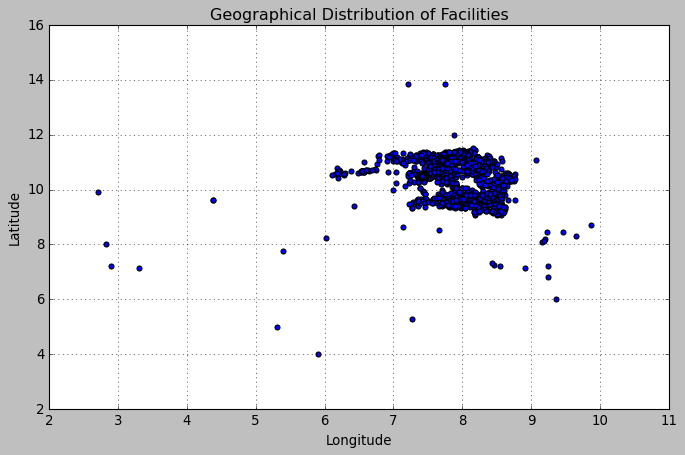

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(data['longitude'], data['latitude'], c='blue', marker='o')
plt.title('Geographical Distribution of Facilities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [16]:
data_count = data["start_date"].value_counts().sort_index()

# A cumulative sum to show progression over time
data_count = data_count.cumsum()

Visualizing the progression of health establishments in Kaduna

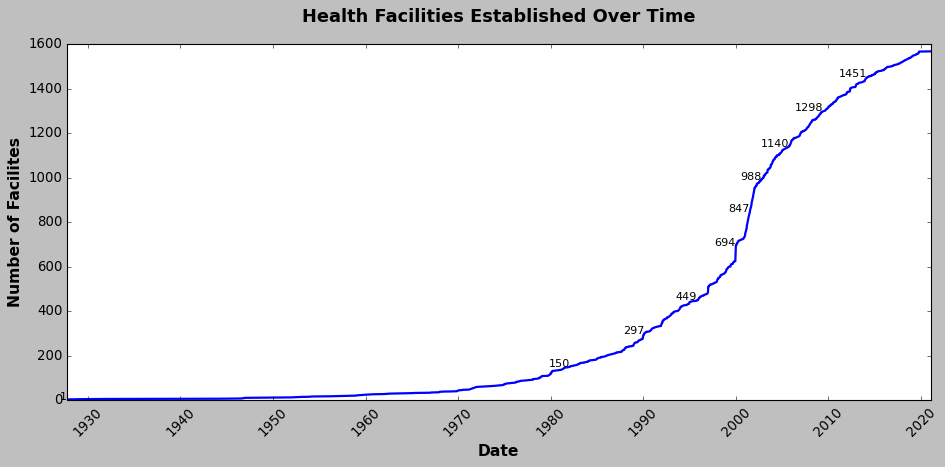

In [17]:

plt.figure(figsize=(12, 6))
plt.plot(data_count.index, data_count.values, linestyle='-', color='b', linewidth=2)


plt.title("Health Facilities Established Over Time", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Date", fontsize=14, fontweight="bold")
plt.ylabel("Number of Facilites", fontsize=14, fontweight="bold")


plt.xticks(rotation=45)


# plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Annotations
for i in range(0, len(data_count), max(1, len(data_count)//10)):
    plt.text(data_count.index[i], data_count.values[i], f'{data_count.values[i]}', fontsize=10, ha='right')


plt.tight_layout()
plt.show()

### Checking the general insights of the LGAs

#### Population

In [18]:
print(population_data.sort_values("Population", ascending=False))

             lga  Population
3          Igabi      636400
22         Zaria      601300
9   Kaduna South      595000
1         Chikun      550000
8   Kaduna North      538600
16          Lere      501900
21  Zangon Kataf      471300
2           Giwa      432000
18    Sabon Gari      430500
20          Soba      430200
14         Kubau      414700
6         Jema'a      411000
0   Birnin Gwari      382000
7         Kachia      373100
10       Kagarko      353200
13         Kauru      326900
4          Ikara      287700
12         Kaura      258000
5           jaba      230400
19         Sanga      223800
17       Makarfi      216600
15         Kudan      205300
11        Kajuru      162200


Visualizing the population data of Kaduna state

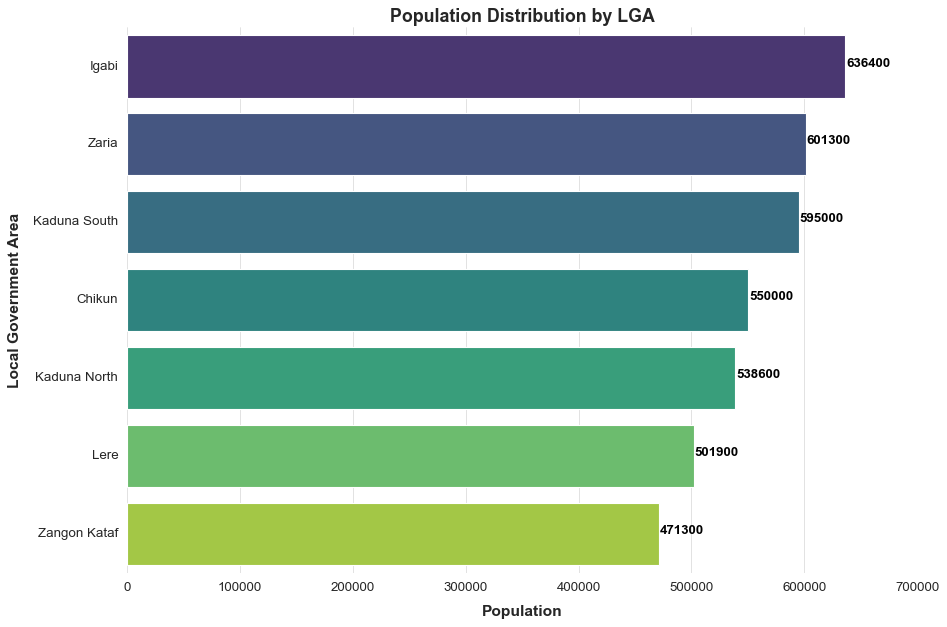

In [19]:

sns.set_style("whitegrid")

# Color palette
palette = sns.color_palette("viridis", n_colors=7)

# Bar plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x='Population',
    y='lga',
    data=population_data.sort_values("Population", ascending=False).head(7),
    palette=palette,
    hue="lga"
)


plt.title("Population Distribution by LGA", fontsize=16, fontweight="bold")
plt.xlabel("Population", fontsize=14, fontweight="bold", labelpad=10)
plt.ylabel("Local Government Area", fontsize=14, fontweight="bold", labelpad=10)

# Adding value labels on the bars
for index, value in enumerate(population_data['Population'].sort_values(ascending=False).head(7)):
    barplot.text(value + 1000, index, f'{value}', color='black', ha="left", fontsize=12, fontweight="bold")


sns.despine(left=True, bottom=True)
plt.tight_layout()


plt.show()


#### Operation Status

In [20]:
data["operation_status"].value_counts()

operation_status
Operational                                  1420
Pending Operation (Construction Complete)      78
Closed (Temporary)                             41
Closed                                         21
Pending Operation                               4
Pending Operation (Under Construction)          3
Name: count, dtype: int64

In [21]:
pending_op_facilites = data["lga"][data["operation_status"] == "Pending Operation (Construction Complete)"].value_counts()


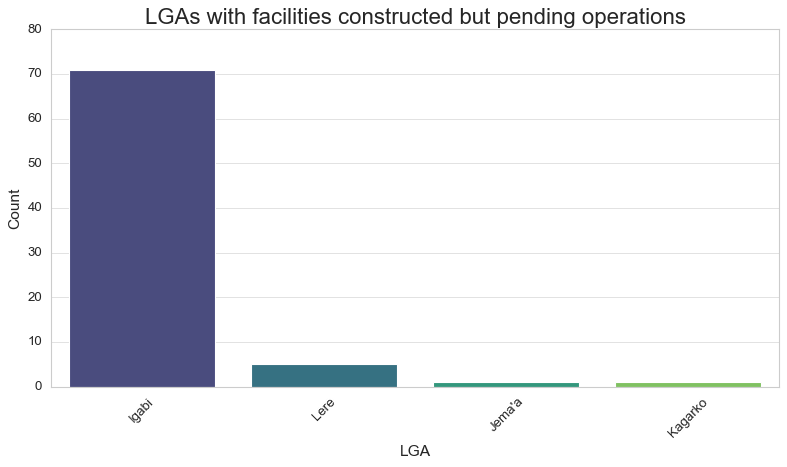

In [22]:
# Plot Pending Operations LGAs
plt.figure(figsize=(10, 6))
sns.barplot(x=pending_op_facilites.index, y=pending_op_facilites.values, palette="viridis", hue=pending_op_facilites.index)
plt.title('LGAs with facilities constructed but pending operations', fontsize=20)
plt.xlabel('LGA', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
operational_facilities = data["lga"][data["operation_status"] == "Operational"].value_counts()


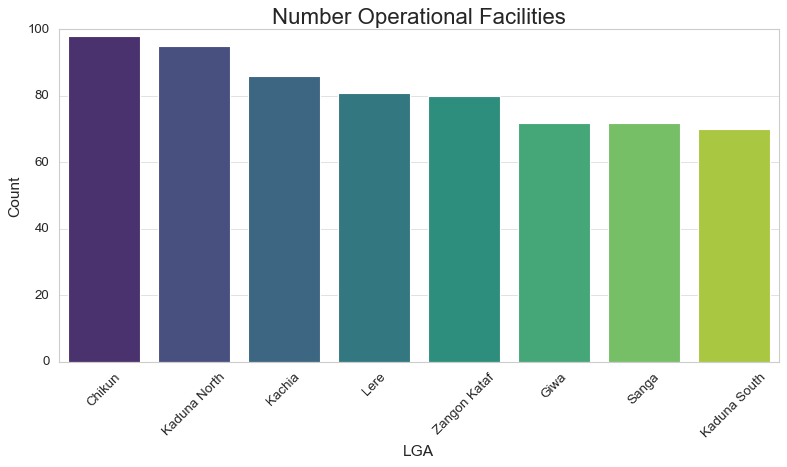

In [24]:
# Plot Total Number of Facilities
plt.figure(figsize=(10, 6))
sns.barplot(x=operational_facilities.head(8).index, y=operational_facilities.head(8).values, palette="viridis", hue=operational_facilities.head(8).index)
plt.title('Number Operational Facilities', fontsize=20)
plt.xlabel('LGA', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [25]:
no_of_facilities = data["lga"].value_counts()


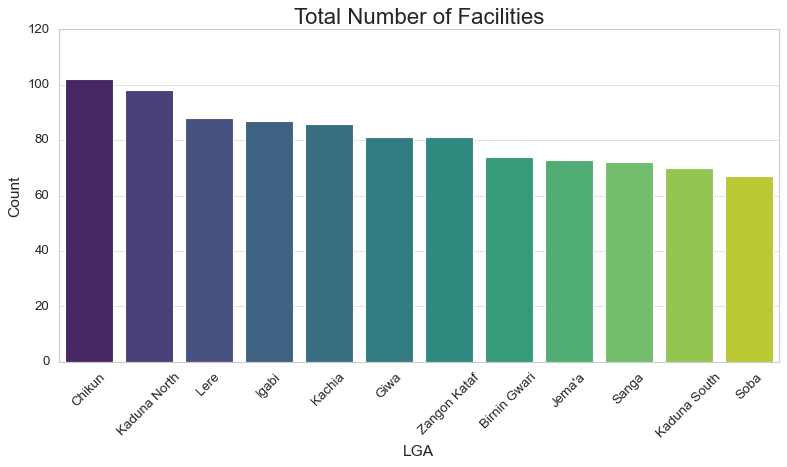

In [26]:
# Plot Total Number of Facilities
plt.figure(figsize=(10, 6))
sns.barplot(x=no_of_facilities.head(12).index, y=no_of_facilities.head(12).values, palette="viridis", hue=no_of_facilities.head(12).index)
plt.title('Total Number of Facilities', fontsize=20)
plt.xlabel('LGA', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [27]:
temp_closed_facilities = data["lga"][data["operation_status"] == "Closed (Temporary)"].value_counts()


In [28]:
data["lga"][data["operation_status"] == "Pending Operation"]

1110            Lere
1159            Lere
1459    Zangon Kataf
1558           Zaria
Name: lga, dtype: object

In [29]:
# Replacing the index of the series with the names of the LGAs 
operational_facilities = operational_facilities.reindex(no_of_facilities.index)

# Comparing the the series to find the ones with the same values
# Which means all the facilities in that LGA are fully operational.
all_operational = operational_facilities == no_of_facilities

fully_operational_lgas = all_operational[all_operational].index.tolist()
print("LGAs with all facilities operational:", fully_operational_lgas)

LGAs with all facilities operational: ['Kachia', 'Sanga', 'Kaduna South', 'Soba', 'Ikara', 'Kajuru', 'Sabon Gari', 'Kudan', 'Kaura']


In [30]:
# Checking the LGAs that are not in the fully_operational_lgas series and adding them to a list.
not_fully_operational_lgas = [i for i in no_of_facilities.index if i not in fully_operational_lgas]
print(not_fully_operational_lgas)

['Chikun', 'Kaduna North', 'Lere', 'Igabi', 'Giwa', 'Zangon Kataf', 'Birnin Gwari', "Jema'a", 'Zaria', 'Kagarko', 'Kubau', 'Kauru', 'jaba', 'Makarfi']


In [31]:
print(f"{round(((no_of_facilities['Igabi'] - operational_facilities['Igabi']) / no_of_facilities['Igabi']) * 100, 2)} % of facilities in Igabi are non operational even when it has the highest population in the state")

91.95 % of facilities in Igabi are non operational even when it has the highest population in the state


In [32]:
# Filter for operational facilities
operational_data_igabi = data[(data["operation_status"] == "Operational") & (data["lga"] == "Igabi")]

# Group by date and count the number of operational facilities
operational_counts_igabi = operational_data_igabi.groupby("start_date").size().cumsum()

Visualizing the progress of registration of facilities over time.

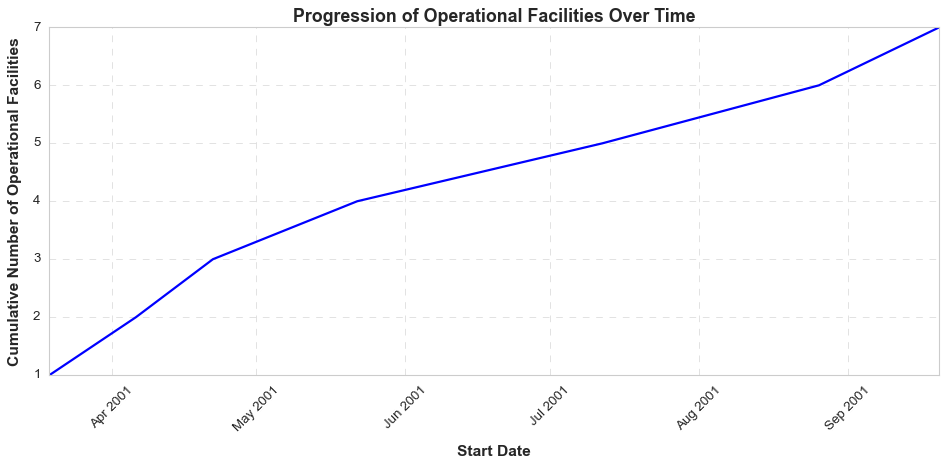

In [33]:

sns.set_style("whitegrid")


plt.figure(figsize=(12, 6))
plt.plot(operational_counts_igabi.index, operational_counts_igabi.values, linestyle='-', color='b', linewidth=2, markersize=6)


plt.title("Progression of Operational Facilities Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Start Date", fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel("Cumulative Number of Operational Facilities", fontsize=14, fontweight='bold', labelpad=10)

# Beautify the x-axis labels
plt.xticks(rotation=45)

# Add grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


Registration Status

In [34]:
data["registration_status"].value_counts()

registration_status
Registered                  1171
Unknown                      237
Not Applicable                91
Pending Registration          46
Provisionally Registered      11
Registration Suspended        11
Name: count, dtype: int64

In [35]:
reg_status_counts = data["registration_status"].value_counts()
lga_registered = data["lga"][data["registration_status"] == "Registered"].value_counts()
lga_reg_unknown = data["lga"][data["registration_status"] == "Unknown"].value_counts()
lga_reg_not_applicable = data["lga"][data["registration_status"] == "Not Applicable"].value_counts()
lga_reg_pending = data["lga"][data["registration_status"] == "Pending Registration"].value_counts()
lga_provisional_reg = data["lga"][data["registration_status"] == "Provisionally Registered"].value_counts()
lga_reg_suspended = data["lga"][data["registration_status"] == "Registration Suspended"].value_counts()


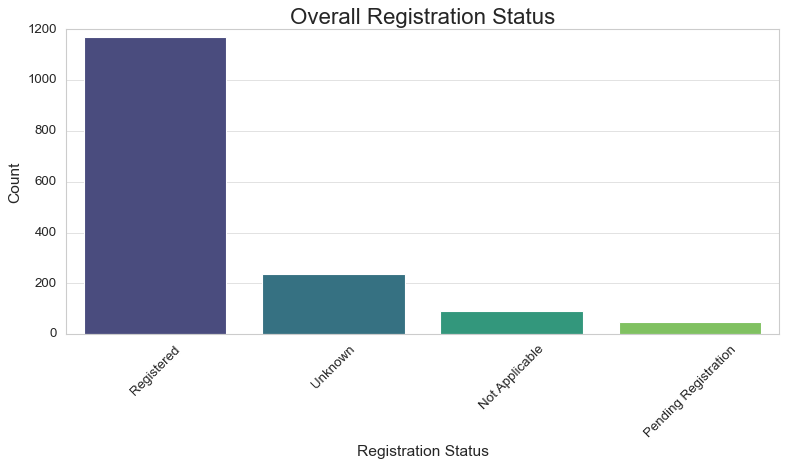

In [36]:
sns.set_style("whitegrid")

# Plot Overall Registration Status Counts
plt.figure(figsize=(10, 6))
sns.barplot(x=reg_status_counts.head(4).index, y=reg_status_counts.head(4).values, palette="viridis", hue=reg_status_counts.head(4).index)
plt.title('Overall Registration Status', fontsize=20)
plt.xlabel('Registration Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


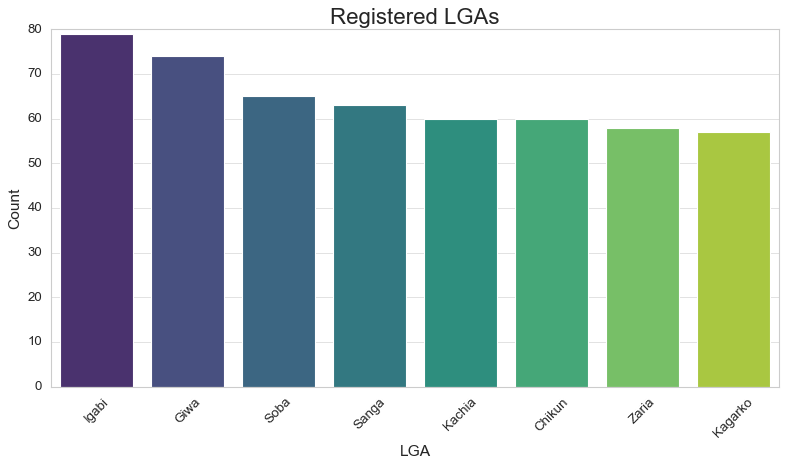

In [37]:
# Plot Registered LGAs
plt.figure(figsize=(10, 6))
sns.barplot(x=lga_registered.head(8).index, y=lga_registered.head(8).values, palette="viridis", hue=lga_registered.head(8).index)
plt.title('Registered LGAs', fontsize=20)
plt.xlabel('LGA', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


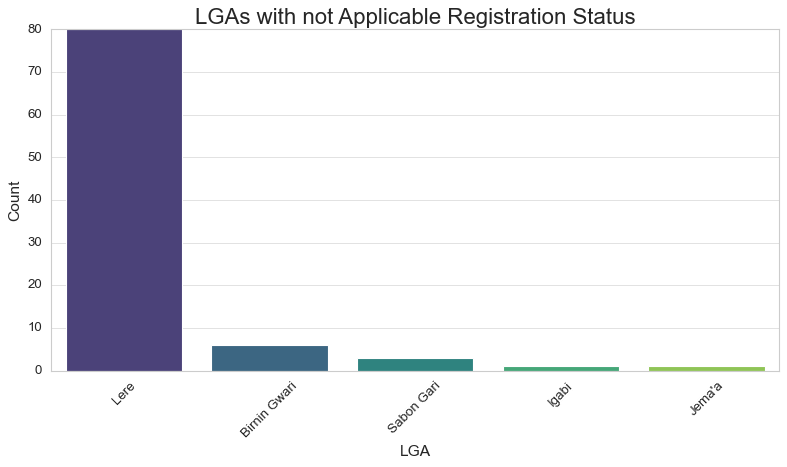

In [38]:
# Plot Not Applicable Registration Status LGAs
plt.figure(figsize=(10, 6))
sns.barplot(x=lga_reg_not_applicable.index, y=lga_reg_not_applicable.values, palette="viridis", hue=lga_reg_not_applicable.index)
plt.title('LGAs with not Applicable Registration Status', fontsize=20)
plt.xlabel('LGA', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


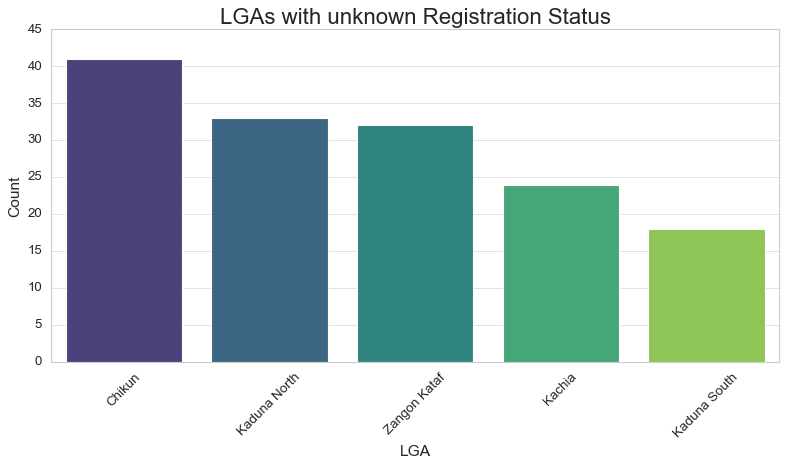

In [39]:
# Plot Unknown Registration Status LGAs
plt.figure(figsize=(10, 6))
sns.barplot(x=lga_reg_unknown.head(5).index, y=lga_reg_unknown.head(5).values, palette="viridis", hue=lga_reg_unknown.head(5).index)
plt.title('LGAs with unknown Registration Status', fontsize=20)
plt.xlabel('LGA', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


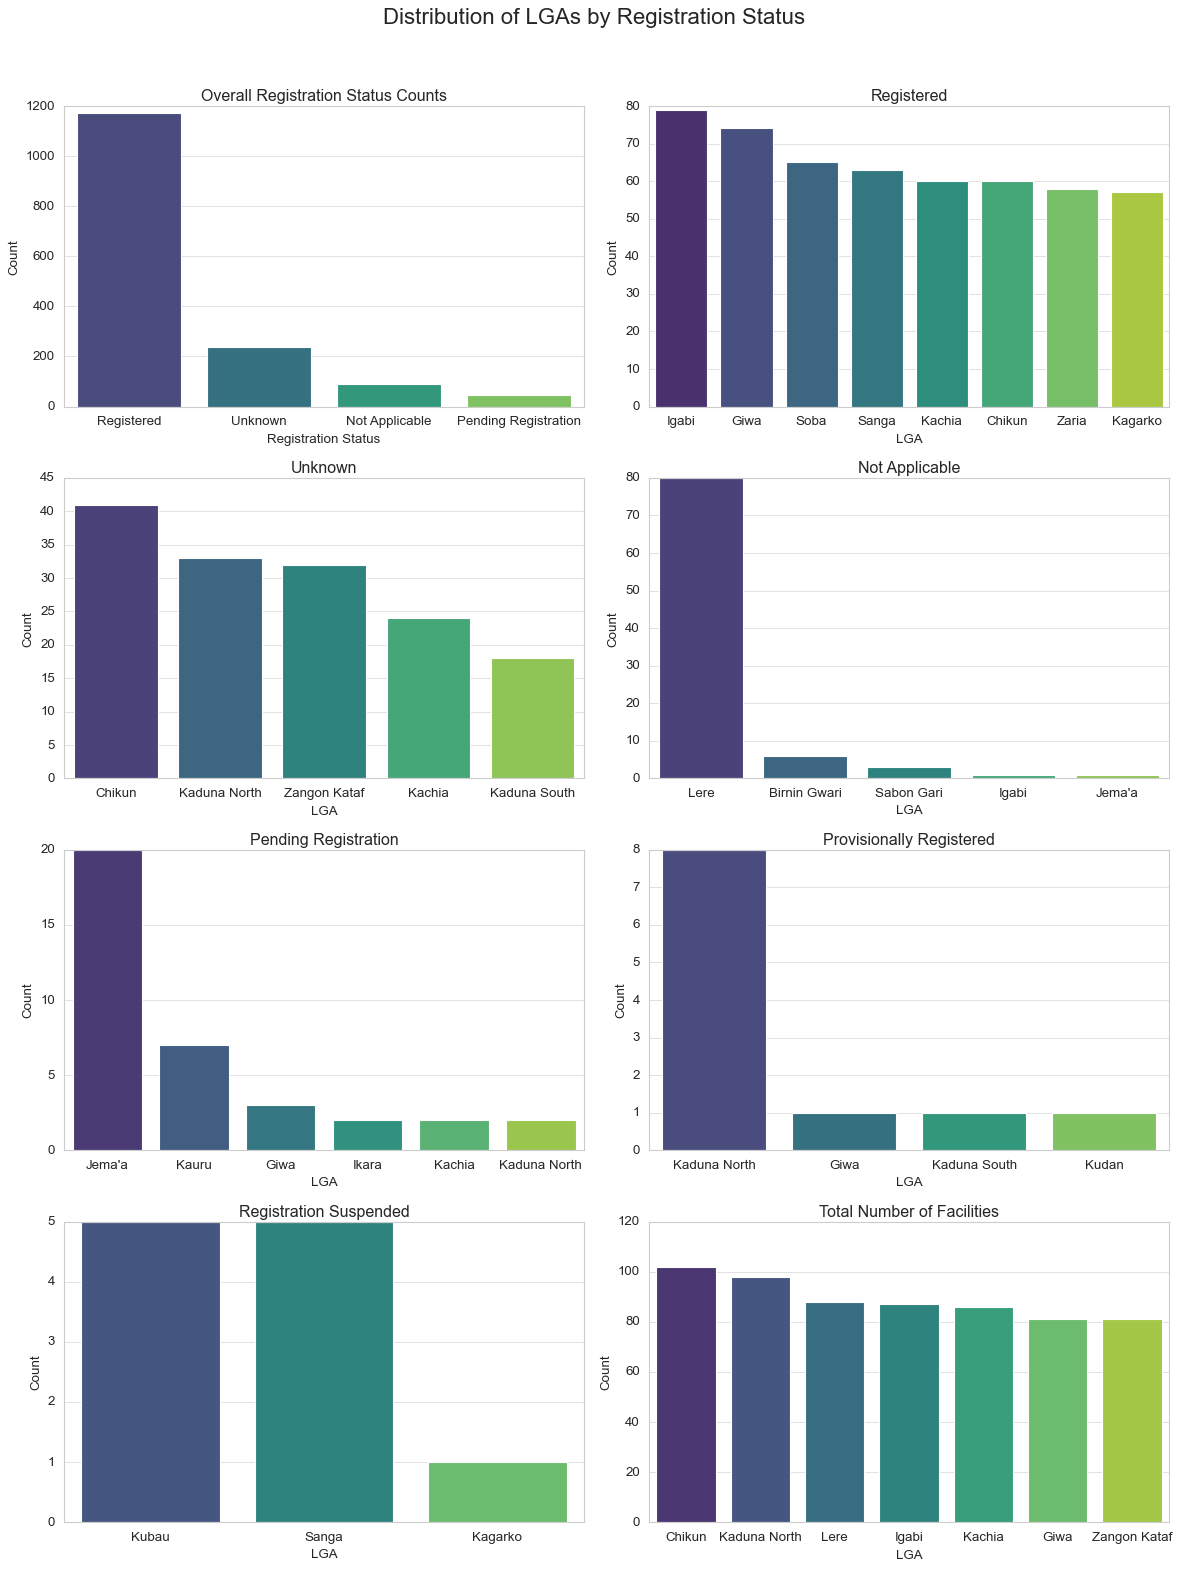

In [40]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Distribution of LGAs by Registration Status', fontsize=20)

# Plot the data
sns.barplot(ax=axes[0, 0], x=reg_status_counts.head(4).index, y=reg_status_counts.head(4).values, palette="viridis", hue=reg_status_counts.head(4).index)
axes[0, 0].set_title('Overall Registration Status Counts')
axes[0, 0].set_xlabel('Registration Status')
axes[0, 0].set_ylabel('Count')

sns.barplot(ax=axes[0, 1], x=lga_registered.head(8).index, y=lga_registered.head(8).values, palette="viridis", hue=lga_registered.head(8).index)
axes[0, 1].set_title('Registered')
axes[0, 1].set_xlabel('LGA')
axes[0, 1].set_ylabel('Count')

sns.barplot(ax=axes[1, 0], x=lga_reg_unknown.head(5).index, y=lga_reg_unknown.head(5).values, palette="viridis", hue=lga_reg_unknown.head(5).index)
axes[1, 0].set_title('Unknown')
axes[1, 0].set_xlabel('LGA')
axes[1, 0].set_ylabel('Count')

sns.barplot(ax=axes[1, 1], x=lga_reg_not_applicable.index, y=lga_reg_not_applicable.values, palette="viridis", hue=lga_reg_not_applicable.index)
axes[1, 1].set_title('Not Applicable')
axes[1, 1].set_xlabel('LGA')
axes[1, 1].set_ylabel('Count')

sns.barplot(ax=axes[2, 0], x=lga_reg_pending.head(6).index, y=lga_reg_pending.head(6).values, palette="viridis", hue=lga_reg_pending.head(6).index)
axes[2, 0].set_title('Pending Registration')
axes[2, 0].set_xlabel('LGA')
axes[2, 0].set_ylabel('Count')

sns.barplot(ax=axes[2, 1], x=lga_provisional_reg.index, y=lga_provisional_reg.values, palette="viridis", hue=lga_provisional_reg.index)
axes[2, 1].set_title('Provisionally Registered')
axes[2, 1].set_xlabel('LGA')
axes[2, 1].set_ylabel('Count')

sns.barplot(ax=axes[3, 0], x=lga_reg_suspended.index, y=lga_reg_suspended.values, palette="viridis", hue=lga_reg_suspended.index)
axes[3, 0].set_title('Registration Suspended')
axes[3, 0].set_xlabel('LGA')
axes[3, 0].set_ylabel('Count')

sns.barplot(ax=axes[3, 1], x=no_of_facilities.head(7).index, y=no_of_facilities.head(7).values, palette="viridis", hue=no_of_facilities.head(7).index)
axes[3, 1].set_title('Total Number of Facilities')
axes[3, 1].set_xlabel('LGA')
axes[3, 1].set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


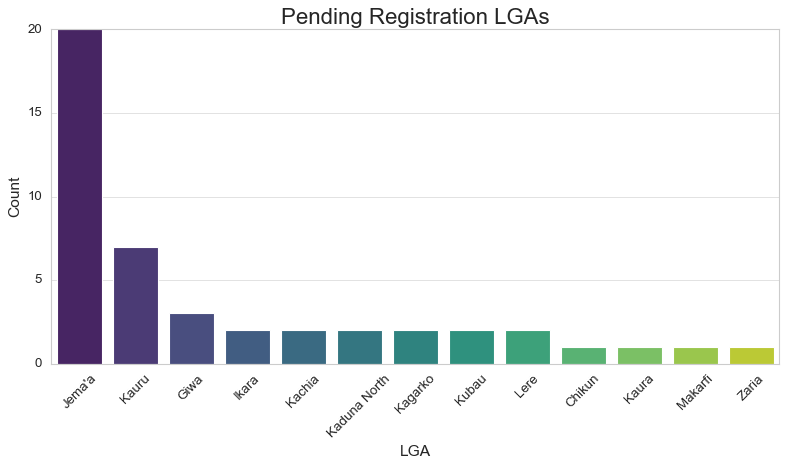

In [41]:
# Plot Pending Registration LGAs
plt.figure(figsize=(10, 6))
sns.barplot(x=lga_reg_pending.index, y=lga_reg_pending.values, palette="viridis", hue=lga_reg_pending.index)
plt.title('Pending Registration LGAs', fontsize=20)
plt.xlabel('LGA', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### License Status

In [42]:
license_counts = data["license_status"].value_counts()

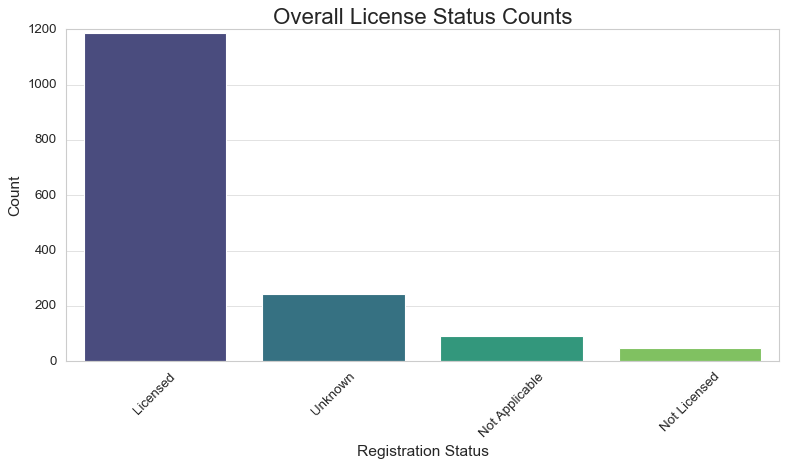

In [43]:
sns.set_style("whitegrid")

# Plot Overall License Status Counts
plt.figure(figsize=(10, 6))
sns.barplot(x=license_counts.index, y=license_counts.values, palette="viridis", hue=license_counts.index)
plt.title('Overall License Status Counts', fontsize=20)
plt.xlabel('Registration Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [44]:
lga_licensed = data["lga"][data["license_status"] == "Licensed"].value_counts()

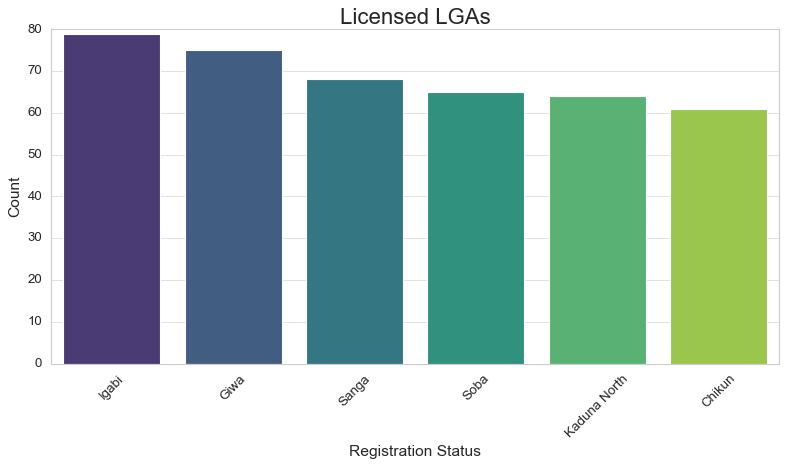

In [45]:
sns.set_style("whitegrid")

# Plot LGAs that are Licensed Counts
plt.figure(figsize=(10, 6))
sns.barplot(x=lga_licensed.head(6).index, y=lga_licensed.head(6).values, palette="viridis", hue=lga_licensed.head(6).index)
plt.title('Licensed LGAs', fontsize=20)
plt.xlabel('Registration Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [46]:
lga_unknown_license = data["lga"][data["license_status"] == "Unknown"].value_counts()

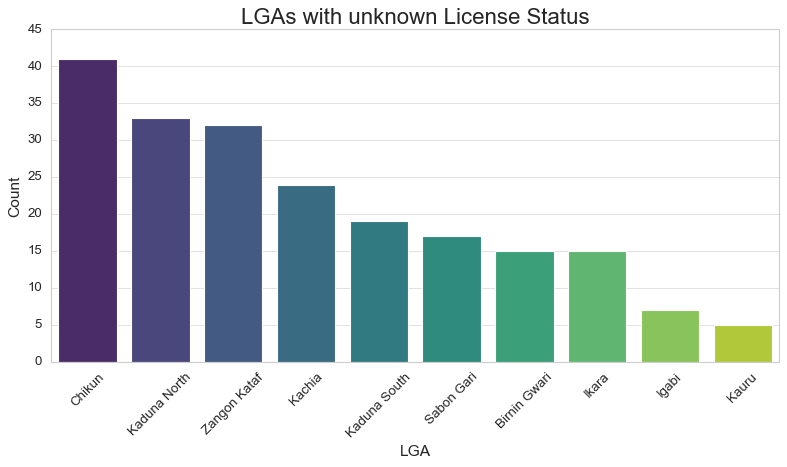

In [47]:
# Plot Unknown license Status LGAs
plt.figure(figsize=(10, 6))
sns.barplot(x=lga_unknown_license.head(10).index, y=lga_unknown_license.head(10).values, palette="viridis", hue=lga_unknown_license.head(10).index)
plt.title('LGAs with unknown License Status', fontsize=20)
plt.xlabel('LGA', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [48]:
data["lga"][data["license_status"] == "Not Applicable"].value_counts()

lga
Lere            80
Birnin Gwari     6
Sabon Gari       3
Igabi            1
Jema'a           1
Name: count, dtype: int64

In [49]:
data["lga"][data["license_status"] == "Not Licensed"].value_counts()

lga
Jema'a          20
Kubau            7
Kauru            6
Kagarko          4
Giwa             3
Ikara            2
Kachia           2
Kaduna North     1
Kaura            1
Lere             1
Zaria            1
Name: count, dtype: int64

In [50]:
data[["lga","license_status", "registration_status"]][(data["registration_status"] == "Registered") & (data["license_status"] != "Licensed")]

,lga,license_status,registration_status
200,Giwa,Unknown,Registered
375,Ikara,Unknown,Registered
439,jaba,Unknown,Registered
782,Kagarko,Not Licensed,Registered
851,Kajuru,Unknown,Registered
874,Kajuru,Unknown,Registered
881,Kajuru,Unknown,Registered


#### Ownership

In [51]:
no_public_in_lga = data["lga"][data["ownership"] == "Public"].value_counts()

In [52]:
no_private_in_lga = data["lga"][data["ownership"] == "Private"].value_counts()

In [53]:
# round((no_private_in_lga / no_of_facilities) * 100).sort_values(ascending=False)
# round((no_public_in_lga / no_of_facilities) * 100).sort_values(ascending=False)

In [54]:
data["operation_status"][data["ownership"] == "Public"].value_counts()

operation_status
Operational                                  1099
Pending Operation (Construction Complete)      65
Closed (Temporary)                             33
Closed                                         12
Pending Operation                               2
Pending Operation (Under Construction)          1
Name: count, dtype: int64

In [55]:
data["operation_status"][data["ownership"] == "Private"].value_counts()

operation_status
Operational                                  321
Pending Operation (Construction Complete)     13
Closed                                         9
Closed (Temporary)                             8
Pending Operation (Under Construction)         2
Pending Operation                              2
Name: count, dtype: int64

In [56]:
data["operation_status"][data["facility_level"] == "Primary"].value_counts()

operation_status
Operational                                  1276
Pending Operation (Construction Complete)      73
Closed (Temporary)                             40
Closed                                         20
Pending Operation                               3
Pending Operation (Under Construction)          1
Name: count, dtype: int64

In [57]:
(137 / 1413) * 100

9.695682944090587

In [58]:
operation_grouped_time = data.groupby(['start_date', 'operation_status']).size().reset_index(name='counts')
operation_pivot_table = operation_grouped_time.pivot_table(index='start_date', columns='operation_status', values='counts', fill_value=0)
operation_pivot_table_cumsum = operation_pivot_table.cumsum()

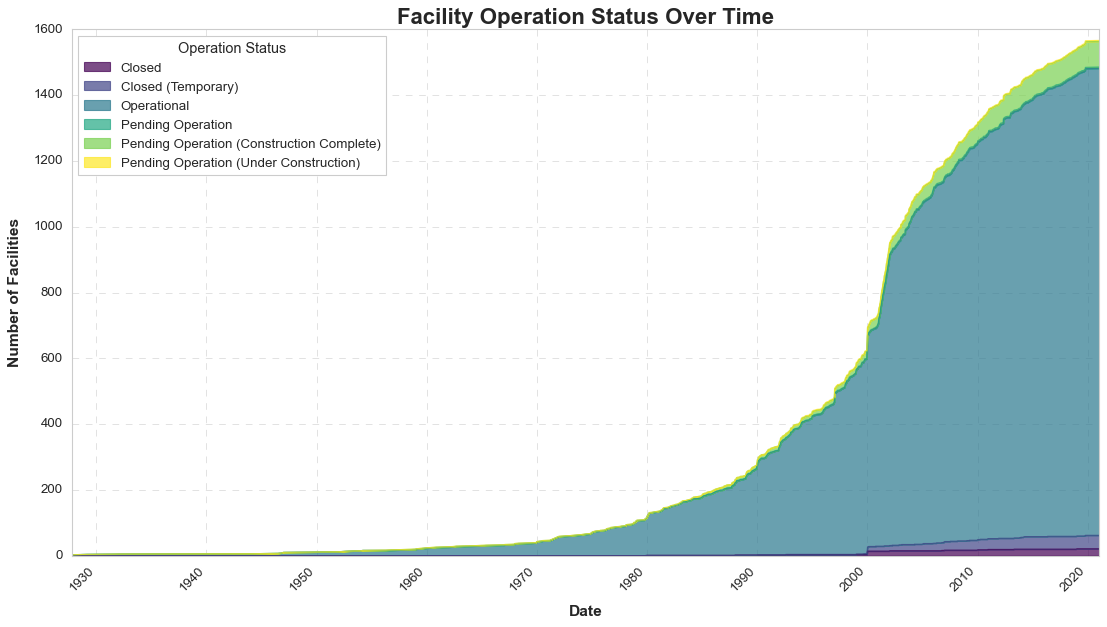

In [59]:

sns.set_style("whitegrid")


operation_pivot_table_cumsum.plot(kind='area', stacked=True, figsize=(14, 8), cmap='viridis', alpha=0.7)


plt.title("Facility Operation Status Over Time", fontsize=20, fontweight='bold')
plt.xlabel("Date", fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel("Number of Facilities", fontsize=14, fontweight='bold', labelpad=10)

# Rotate dates
plt.xticks(rotation=45)

# Add grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add legend
plt.legend(title='Operation Status', fontsize=12, title_fontsize='13', loc="upper left")


plt.tight_layout()
plt.show()


In [60]:
data.to_excel("kad health.xlsx", sheet_name="data")